# Team pace box-and-whisker plot example

This creates a box-and-whisker plot illustrating the range of observed team pace
across the 2025 Saudi Arabia GP.

This was adapted from the [Team Pace Comparison](https://docs.fastf1.dev/gen_modules/examples_gallery/plot_team_pace_ranking.html) example from the FastF1 website.

## Define packages and variables

We start by loading the packages, palettes, and variables we'll use through the
rest of the notebook.

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

# Define variables
race = 'Jeddah'
season = 2025

## Load data

With the foundation laid, now we load the data we'll be using.

In [12]:
race = fastf1.get_session(season, race, 'R')
race.load()
laps = race.laps.pick_quicklaps()

core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '1', '16', '4', '63', '12', '44', '55', '23', '6', '14', '30', '87', '31', '27', '18', '7', '5', '22', '10']


## Transform data

From the reference example:

> Convert the lap time column from timedelta to integer. This is a seaborn-specific modification. If plotting with matplotlib, set mpl_timedelta_support to true with plotting.setup_mpl.

In [22]:
transformed_laps = laps.copy()
transformed_laps.loc[:, "LapTime (s)"] = laps["LapTime"].dt.total_seconds()

In [24]:
# order the team from the fastest (lowest median lap time) to slower
team_order = (
    transformed_laps[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)
print(team_order)

# make a color palette associating team names to hex codes
team_palette = {team: fastf1.plotting.get_team_color(team, session=race)
                for team in team_order}

Index(['Red Bull Racing', 'McLaren', 'Ferrari', 'Mercedes', 'Williams',
       'Racing Bulls', 'Haas F1 Team', 'Aston Martin', 'Kick Sauber',
       'Alpine'],
      dtype='object', name='Team')


## Generate plots

With the data loaded, and transformed into a usable format for our packages, we
now just need to create plots.

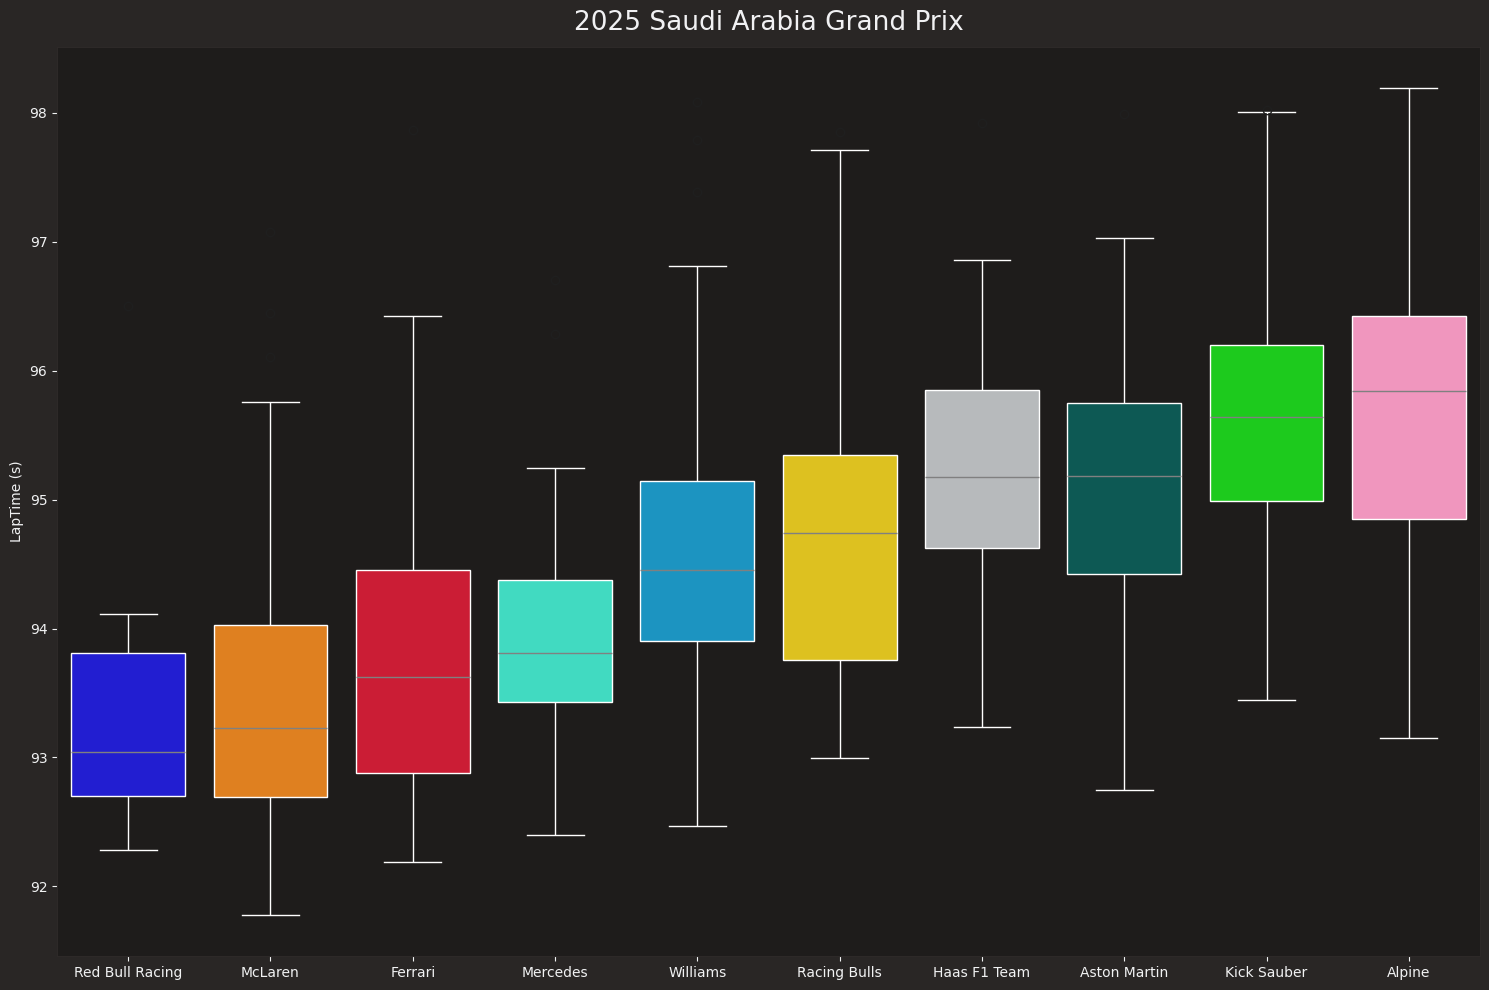

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transformed_laps,
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=team_order,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2025 Saudi Arabia Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

---

This is the end of the notebook.